Code from pypsa-earth BOL- see if you can findthe original code somewhere

In [5]:
# Fuel costs for Natural Gas and Coal plants in $/kWh from the table in PSMP 2020 update
natural_gas_fuel_costs = [
    0.0460, 0.0312, 0.0339, 0.0347, 0.0339, 0.0339, 0.0339, 0.0339, 
    0.0347, 0.0339, 0.0347, 0.0312, 0.0339, 0.0339, 0.0339, 0.0339
]

coal_fuel_costs = [
    0.0212, 0.0212, 0.0212, 0.0231, 0.0231, 0.0189, 0.0189, 0.0212,
    0.0212, 0.0212, 0.0212, 0.0212, 0.0212, 0.0212, 0.0212
]

# Calculate the averages in $/kWh
avg_natural_gas_fuel_cost = sum(natural_gas_fuel_costs) / len(natural_gas_fuel_costs)
avg_coal_fuel_cost = sum(coal_fuel_costs) / len(coal_fuel_costs)

# Convert $/kWh to EUR/MWh (1 USD = 0.92 EUR, and 1 MWh = 1000 kWh)
usd_to_eur = 0.92
conversion_factor = 1000 * usd_to_eur

avg_natural_gas_fuel_cost_eur_mwh = avg_natural_gas_fuel_cost * conversion_factor
avg_coal_fuel_cost_eur_mwh = avg_coal_fuel_cost * conversion_factor

avg_natural_gas_fuel_cost_eur_mwh, avg_coal_fuel_cost_eur_mwh

(31.71125, 19.45493333333333)

In [2]:
import logging
import warnings
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import geopandas as gpd
import seaborn as sns
warnings.filterwarnings('ignore')
logging.getLogger().setLevel(logging.WARNING)

INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


Available networks: dict_keys([2030])


ValueError: zero-size array to reduction operation minimum which has no identity

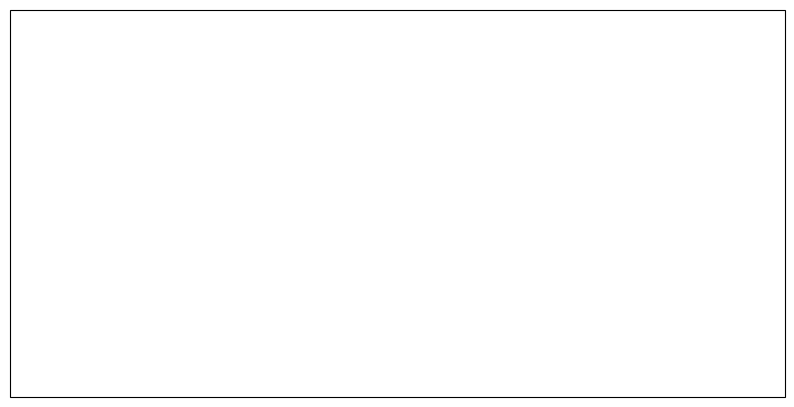

In [4]:


# Define the year
second_year = 2030  # or the appropriate year

# Load the network for the specified year
network_file = f"C:/Users/hie/pe_tan/pypsa-earth/results/networks/elec_s_all_ec_lcopt_1h.nc"
networks = {second_year: pypsa.Network(network_file)}

# Check if the network for the specified year is loaded
print("Available networks:", networks.keys())

# Ensure the network for the specified year is available
if second_year in networks:
    n = networks[second_year]

    max_node_size = 0.1  # maximum size of a node for plotting purposes [used in plots]

    def normalize_node_size(values, max_node_size=max_node_size):
        return values / values.max() * max_node_size

    fig, ax = plt.subplots(
        figsize=(10, 10),
        subplot_kw={
            "projection": ccrs.PlateCarree()
        },  # PlateCarree(default), Mercator, Orthographic
    )

    n.plot(
        margin=0.1,
        ax=ax,
        geomap=True,  #'10m' leads to a beautiful high resolution map
        projection=None,
        bus_colors="cadetblue",
        bus_alpha=1,
        bus_sizes=normalize_node_size(
            n.loads_t.p_set.sum().rename("load").rename_axis("bus")
        ),
        bus_cmap=None,
        line_colors="rosybrown",
        link_colors="darkseagreen",  # loading
        transformer_colors="orange",
        line_widths=n.lines.s_nom_opt / 3e2,
        link_widths=1.5,
        transformer_widths=1.5,
        line_cmap=None,
        link_cmap=None,  # plt.cm.virdis (colordmap for line loading)
        transformer_cmap=None,
        flow=None,
        branch_components=None,
        layouter=None,
        title="",
        boundaries=None,
        geometry=False,
        jitter=None,
        color_geomap=True,
    )  # None or True

    ax.axis("off")
    plt.show()
else:
    print(f"Network for the year {second_year} is not available.")

In [ ]:
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define the year
first_year = 2020  # or the appropriate year

# Load the network for the specified year
network_file = f"C:/Users/hie/pe_tan/pypsa-earth/results/networks/elec_s_all_ec_lcopt_1h.nc"
networks = {second_year: pypsa.Network(network_file)}

# Check if the network for the specified year is loaded
print("Available networks:", networks.keys())

# Ensure the network for the specified year is available
if first_year in networks:
    n = networks[first_year]

    max_node_size = 0.1  # maximum size of a node for plotting purposes [used in plots]

    def normalize_node_size(values, max_node_size=max_node_size):
        return values / values.max() * max_node_size

    fig, ax = plt.subplots(
        figsize=(10, 10),
        subplot_kw={
            "projection": ccrs.PlateCarree()
        },  # PlateCarree(default), Mercator, Orthographic
    )

    n.plot(
        margin=0.1,
        ax=ax,
        geomap=True,  #'10m' leads to a beautiful high resolution map
        projection=None,
        bus_colors="cadetblue",
        bus_alpha=1,
        bus_sizes=normalize_node_size(
            n.loads_t.p_set.sum().rename("load").rename_axis("bus")
        ),
        bus_cmap=None,
        line_colors="rosybrown",
        link_colors="darkseagreen",  # loading
        transformer_colors="orange",
        line_widths=n.lines.s_nom_opt / 3e2,
        link_widths=1.5,
        transformer_widths=1.5,
        line_cmap=None,
        link_cmap=None,  # plt.cm.virdis (colordmap for line loading)
        transformer_cmap=None,
        flow=None,
        branch_components=None,
        layouter=None,
        title="",
        boundaries=None,
        geometry=False,
        jitter=None,
        color_geomap=True,
    )  # None or True

    ax.axis("off")
    plt.show()
else:
    print(f"Network for the year {first_year} is not available.")

INFO:pypsa.io:Imported network elec_s_25_ec_lcopt_Co2L-24h.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


Available networks: dict_keys([2030])
Network for the year 2020 is not available.


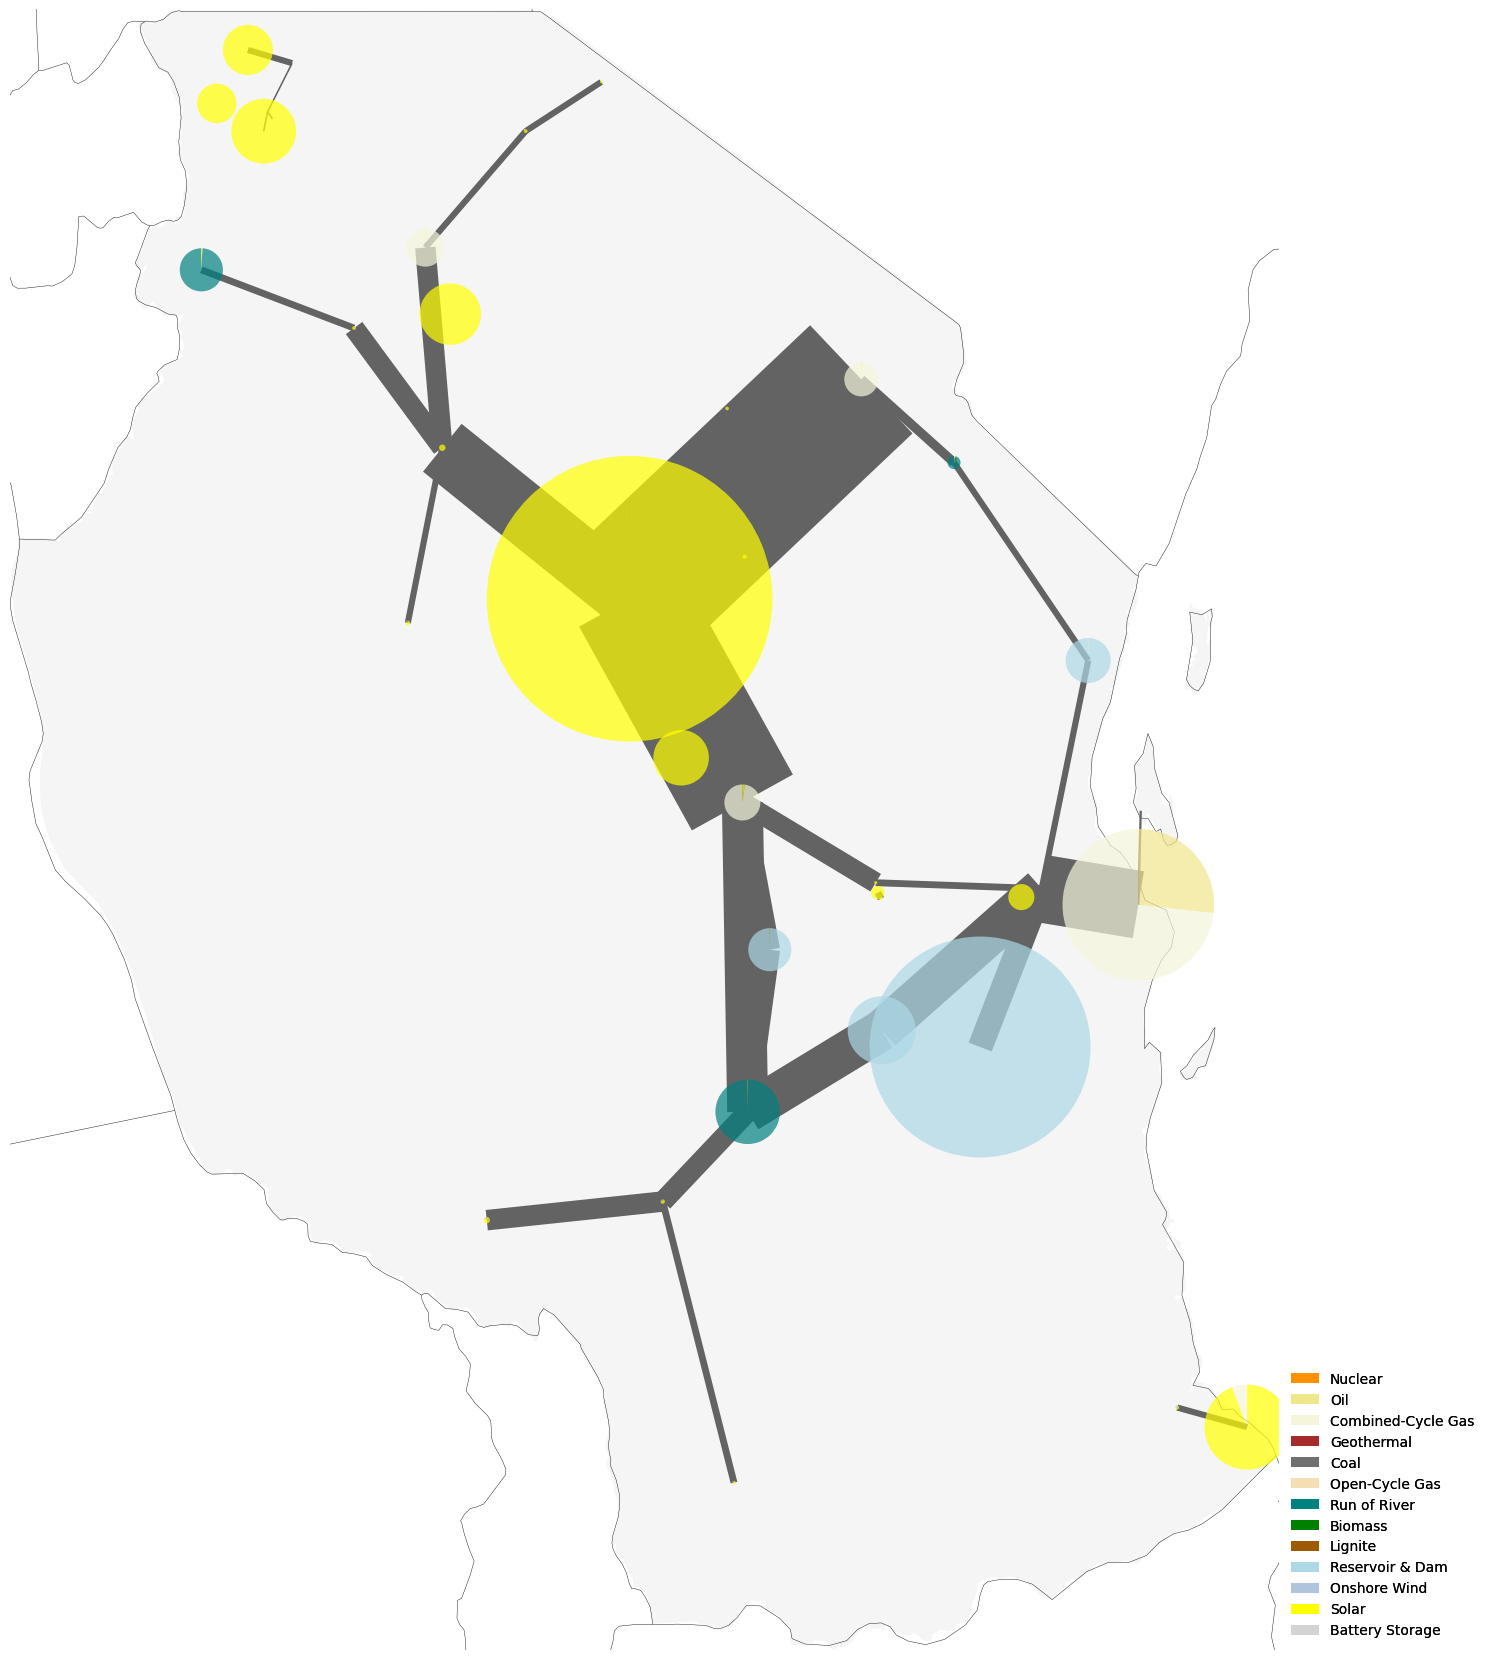

In [ ]:
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import pandas as pd

network_fin = networks[second_year]
n = network_fin
path = "C:/Users/hie/pe_tan/pypsa-earth/"
if 'PHS' in n.carriers.index:
    n.carriers = n.carriers.drop(index='PHS')
if 'Load' in n.carriers.index:
    n.carriers = n.carriers.drop(index='Load')

# Use valid color names
n.carriers.color['geothermal'] = "brown"
n.carriers.color['ror'] = "teal"
n.carriers.color['hydro'] = "lightblue"
n.carriers.color['battery'] = "lightgrey"
n.carriers.color['CCGT'] = "beige"
n.carriers.color['OCGT'] = "wheat"
n.carriers.color['oil'] = "khaki"
n.carriers.color['onwind'] = "lightsteelblue"
n.carriers.color['solar'] = "yellow"
n.carriers.color['biomass'] = "green"
n.carriers

bus_scale = 3e3
line_scale = 1e2

from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches

regions_onshore = gpd.read_file(path + "resources/shapes/country_shapes.geojson")

fig, ax = plt.subplots(figsize=(15, 20), subplot_kw={"projection": ccrs.EqualEarth(n.buses.x.mean())})
gen = n.generators
gen = gen[~gen['carrier'].str.contains('load')]
gen = gen.groupby(["bus", "carrier"]).p_nom_opt.sum()
sto = n.storage_units.groupby(["bus", "carrier"]).p_nom_opt.sum()
buses = pd.concat([gen, sto])

bus_sizes = buses / bus_scale

line_snom = n.lines.s_nom

with plt.rc_context({"patch.linewidth": 0.}):
    n.plot(
        bus_sizes=buses / bus_scale,
        bus_alpha=0.7,
        line_widths=n.lines.s_nom_opt / line_scale,
        link_widths=n.links.p_nom_opt / line_scale,
        line_colors='#636363',
        ax=ax,
        margin=0.2,
        color_geomap=None,
    )
regions_onshore.plot(
    ax=ax,
    facecolor="whitesmoke",
    edgecolor="white",
    aspect="equal",
    transform=ccrs.PlateCarree(),
    linewidth=0,
)
ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
legend_kwargs = {"loc": "upper left", "frameon": False}
# circles legend may require some fine-tuning
legend_circles_dict = {"bbox_to_anchor": (1, 0.6), "labelspacing": 5, **legend_kwargs}
bus_sizes = [50, 500, 1000, 1500, 2000]  # in MW
line_sizes = [100, 500, 1000, 1500]  # in MW

# add_legend_circles(
#     ax,
#     [s / bus_scale for s in bus_sizes],
#     [f"{s/1000} GW" for s in bus_sizes],
#     patch_kw={"alpha": 0.8},
#     legend_kw=legend_circles_dict,    
# )
# add_legend_lines(
#     ax,
#     [s / line_scale for s in line_sizes],
#     [f"{s} MW" for s in line_sizes],
#     legend_kw={"bbox_to_anchor": (1, 0.8), **legend_kwargs},
# )
add_legend_patches(
    ax,
    n.carriers.color,
    n.carriers.nice_name,
    legend_kw={"bbox_to_anchor": (1, 0), **legend_kwargs, "loc":"lower left"},
)

#plt.title(f"{case} - {final_year}")

fig.tight_layout()